In [44]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [45]:
stroke_df = pd.read_csv('/Users/meghalshah/Desktop/healthcare-dataset-stroke-data.csv')
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [46]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [57]:
stroke_df= stroke_df.dropna()
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [48]:
stroke_df= stroke_df.drop_duplicates()

In [49]:
stroke_df = stroke_df.drop(stroke_df[stroke_df['gender']== 'Other'].index)

In [50]:
stroke_df.min()

id                         77
gender                 Female
age                      0.08
hypertension                0
heart_disease               0
ever_married               No
work_type            Govt_job
Residence_type          Rural
avg_glucose_level       55.12
bmi                      10.3
smoking_status        Unknown
stroke                      0
dtype: object

In [51]:
stroke_df.to_csv('cleaned_data.csv', index=False)

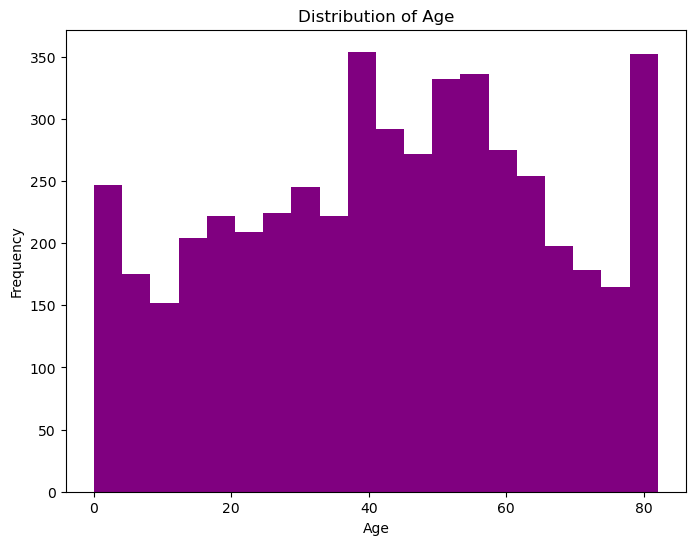

In [52]:
plt.figure(figsize=(8, 6))
plt.hist(stroke_df['age'], bins=20, color='purple')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

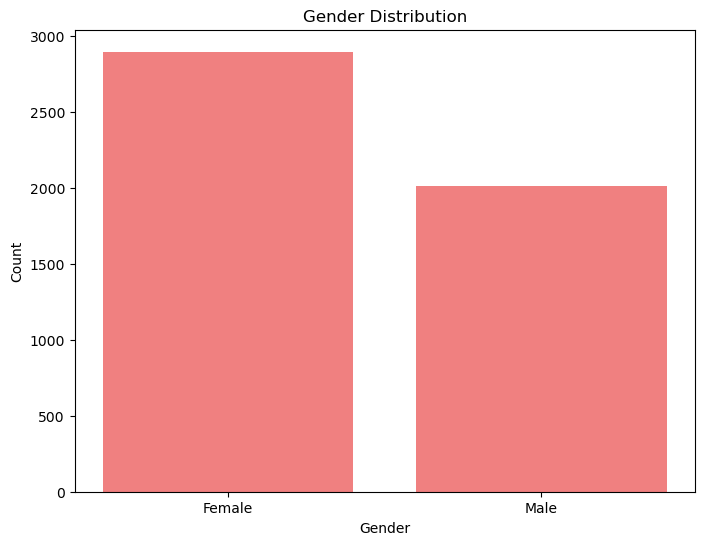

In [53]:
gender_counts = stroke_df['gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values, color='lightcoral')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

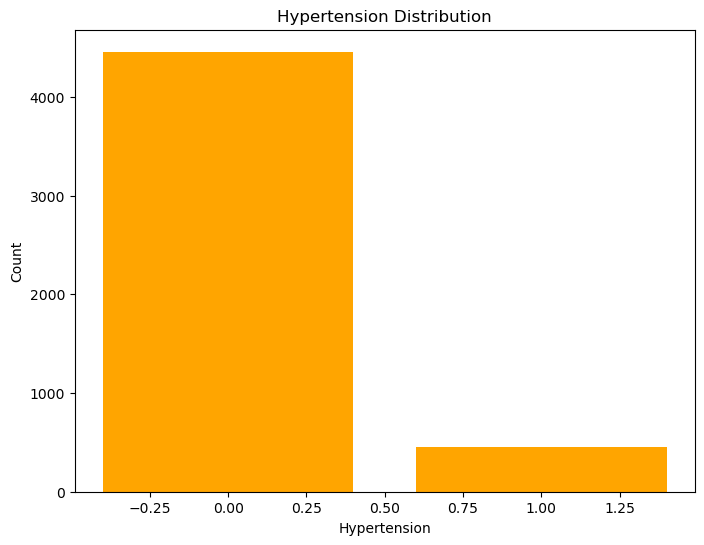

In [54]:
hypertension_counts = stroke_df['hypertension'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(hypertension_counts.index, hypertension_counts.values, color='orange')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.title('Hypertension Distribution')
plt.show()

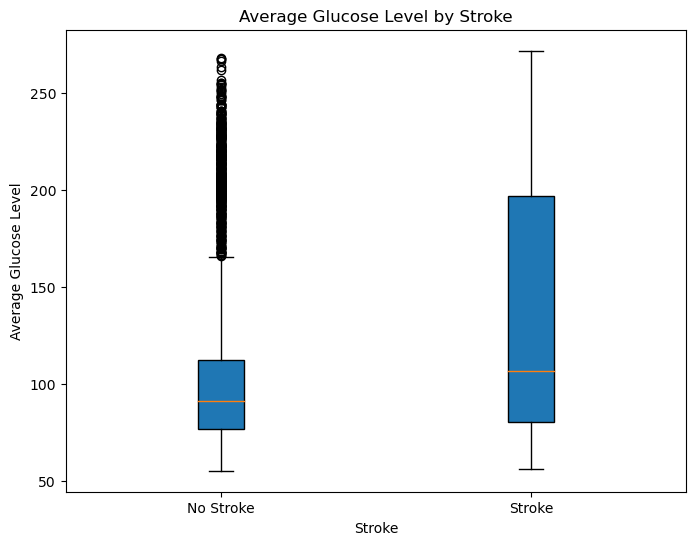

In [55]:
plt.figure(figsize=(8, 6))
plt.boxplot([stroke_df[stroke_df['stroke'] == 0]['avg_glucose_level'], stroke_df[stroke_df['stroke'] == 1]['avg_glucose_level']], labels=['No Stroke', 'Stroke'], patch_artist=True)
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.title('Average Glucose Level by Stroke')
plt.show()

In [59]:
correlation_matrix = stroke_df.corr()


/var/folders/c7/3k5xxm6n2v5634sl3lc_5tch0000gn/T/ipykernel_86653/2945825874.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = stroke_df.corr()


<Figure size 1200x800 with 0 Axes>

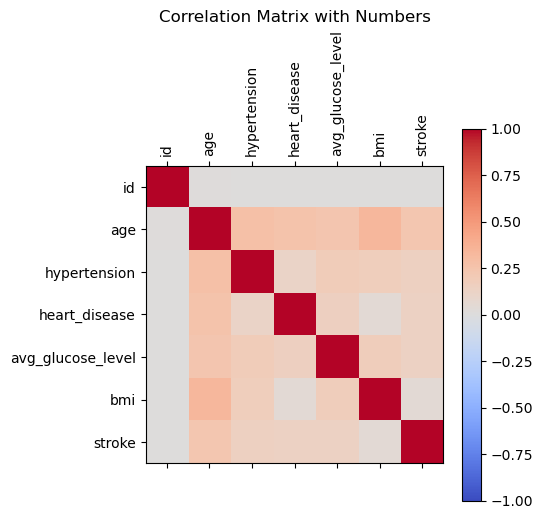

In [62]:
plt.figure(figsize=(12, 8))
cax = plt.matshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(cax)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix with Numbers')
plt.show()


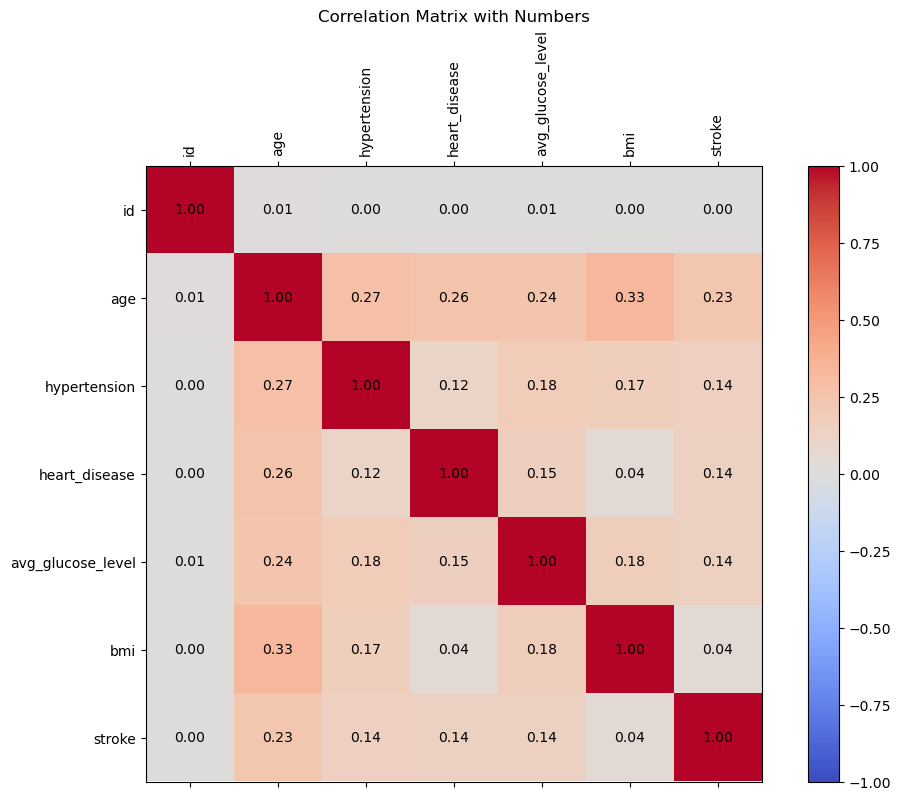

In [63]:
fig, ax = plt.subplots(figsize=(12, 8))

# Create a heatmap with numerical values
cax = ax.matshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(cax)

# Add numerical values to each cell
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        ax.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', va='center', ha='center', fontsize=10, color='black')

# Add labels and title
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix with Numbers')

plt.show()